In [426]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime
from scipy.stats import norm
import json

##### Importing the esv data

In [209]:
with open ("C:/Users/Rahul/Downloads/Data/ESV DATA.txt", "r") as f:
    data = json.load(f)

In [210]:
esv = pd.json_normalize(data)

In [211]:
data_columns = [col for col in esv.columns if col.endswith('.DATA')]

In [212]:
stock_data_list = []

##### Process each stocks's '.DATA' column

In [214]:
for col in data_columns:
    stock_name = col.split('.')[0] 

    df_expanded = pd.json_normalize(esv[col][0])
    df_expanded.insert(0, "Stock", stock_name)
    stock_data_list.append(df_expanded)

df_final = pd.concat(stock_data_list, ignore_index = True).set_index("Stock")


In [215]:
df_final.head()

,STOCK,_id.$oid,5m.perc_chg,5m.per_volume_change,5m.PDEMA20,5m.PDEMA50,5m.PDSMA200,5m.PDVWAP,5m.EMA20D50,5m.EMA20D200,...,W.NFO_VOL_PGL,W.OiChg,W.OI_PGL,DateTime.$date,5m.N50_OI_PGL,15m.N50_OI_PGL,D.N50_OI_PGL,H.N50_OI_PGL,M.N50_OI_PGL,W.N50_OI_PGL
Stock,,,,,,,,,,,,,,,,,,,,,
ABB,ABB,63ce5220c928edf59bf5578e,0.02,23.77,0.13,0.36,3.3,0.49,0.23,3.17,...,,38.25,Top_20G,2023-02-08T15:34:31.453Z,NaN,NaN,NaN,NaN,NaN,NaN
ABB,ABB,63ce5220c928edf59bf5578e,-0.04,-3.26,-0.04,0.16,1.95,0.34,0.2,1.99,...,,48.64,Top_20G,2023-02-09T15:34:35.165Z,NaN,NaN,NaN,NaN,NaN,NaN
ABB,ABB,63ce5220c928edf59bf5578e,-0.04,290.93,0.32,0.66,1.64,0.63,0.34,1.32,...,,74.00,Top_20G,2023-02-10T15:33:31.494Z,NaN,NaN,NaN,NaN,NaN,NaN
ABB,ABB,63ce5220c928edf59bf5578e,0.14,21.26,0.04,-0.33,-1.4,-1.33,-0.38,-1.45,...,Top_10G,30.80,Top_10G,2023-02-13T15:34:29.071Z,NaN,NaN,NaN,NaN,NaN,NaN
ABB,ABB,63ce5220c928edf59bf5578e,-0.19,-60.07,-0.36,-0.73,-1.33,-1.34,-0.37,-0.97,...,Top_10G,15.09,Top_20G,2023-02-14T15:34:04.092Z,NaN,NaN,NaN,NaN,NaN,NaN


In [217]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67729 entries, ABB to NIFTY OIL AND GAS
Columns: 170 entries, STOCK to W.N50_OI_PGL
dtypes: float64(18), object(152)
memory usage: 88.4+ MB


##### Importing Data from hover.txt

In [222]:
with open("C:/Users/Rahul/Downloads/Data/HOVER DATA.txt", "r") as f:
    data = json.load(f)

In [223]:
hover = pd.json_normalize(data)

In [224]:
hover

,BSE._id.$oid,BSE.STOCK,BSE.DATA,BAJAJ-AUTO._id.$oid,BAJAJ-AUTO.STOCK,BAJAJ-AUTO.DATA,BAJFINANCE._id.$oid,BAJFINANCE.STOCK,BAJFINANCE.DATA,BAJAJFINSV._id.$oid,...,NIFTY PSU BANK.DATA,NIFTY HEALTHCARE._id.$oid,NIFTY HEALTHCARE.STOCK,NIFTY HEALTHCARE.DATA,NIFTY OIL AND GAS._id.$oid,NIFTY OIL AND GAS.STOCK,NIFTY OIL AND GAS.DATA,360ONE._id.$oid,360ONE.STOCK,360ONE.DATA
0,63edccc01f84e33ef6034c0d,BSE,"[{'_id': {'$oid': '63d7462f5450af6f6de16a49'},...",63edccc01f84e33ef6034c32,BAJAJ-AUTO,"[{'_id': {'$oid': '63d7462f5450af6f6de16aea'},...",63edccc01f84e33ef6034c43,BAJFINANCE,"[{'_id': {'$oid': '63d7462f5450af6f6de16bac'},...",63edccc11f84e33ef6034c52,...,"[{'_id': {'$oid': '646caf0faa40c4eb599dd5d9'},...",646de175aa40c4eb59b7b95f,NIFTY HEALTHCARE,"[{'_id': {'$oid': '646caf10aa40c4eb599dd900'},...",646de176aa40c4eb59b7ba0a,NIFTY OIL AND GAS,"[{'_id': {'$oid': '646caf11aa40c4eb599dda89'},...",646de176aa40c4eb59b7ba38,360ONE,"[{'_id': {'$oid': '646caf11aa40c4eb599ddb26'},..."


In [225]:
data_columns = [col for col in hover.columns if col.endswith('.DATA')]

In [226]:
stock_data_list = []

##### Process each stocks's '.DATA' column

In [228]:
for col in data_columns:
    stock_name = col.split('.')[0] 

    df_expanded = pd.json_normalize(hover[col][0])
    df_expanded.insert(0, "Stock", stock_name)
    stock_data_list.append(df_expanded)

hover_final = pd.concat(stock_data_list, ignore_index = True).set_index("Stock")


In [229]:
hover_final.head()

,STOCK,_id.$oid,5m.Prev_5m_PerChange,5m.Prev_Prev_5m_PerChange,5m.Prev_5m_close,5m.perc_chg,5m.InOutEdge,5m.MP20,5m.MP50,5m.MP200,...,W.BELPVT,W.BULCO,W.BELCO,W.per_volume_change,W.open_equals_high,W.open_equals_low,W.M_RSI,DateTime.$date,W.M_EMA20,W.M_EMA50
Stock,,,,,,,,,,,,,,,,,,,,,
BSE,BSE,63d7462f5450af6f6de16a49,0.04,0.21,487.5,-0.16,,5mPB20,5mPB50,5mPB200,...,,,BELCO,-41.01,False,False,,2023-02-08T15:33:57Z,NaN,NaN
BSE,BSE,63d7462f5450af6f6de16a49,0.05,-0.22,504.85,0.17,I5m,5mPA20,5mPA50,5mPA200,...,,,BELCO,-1.87,False,False,,2023-02-09T15:34:57Z,NaN,NaN
BSE,BSE,63d7462f5450af6f6de16a49,-0.46,0.0,499.2,0.36,,5mPA20,5mPB50,5mPA200,...,,,,23.11,False,False,,2023-02-10T15:34:42Z,NaN,NaN
BSE,BSE,63d7462f5450af6f6de16a49,-0.16,-0.11,488.25,0.16,I5m,5mPB20,5mPB50,5mPB200,...,,,,-86.66,False,False,,2023-02-13T15:34:05Z,NaN,NaN
BSE,BSE,63d7462f5450af6f6de16a49,-0.03,-0.1,481.3,0.04,,5mPB20,5mPB50,5mPB200,...,,,,-73.34,False,False,,2023-02-14T15:34:02Z,NaN,NaN


In [230]:
hover_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64298 entries, BSE to 360ONE
Columns: 167 entries, STOCK to W.M_EMA50
dtypes: bool(21), int64(1), object(145)
memory usage: 73.4+ MB


In [232]:
hover_final.columns

Index(['STOCK', '_id.$oid', '5m.Prev_5m_PerChange',
       '5m.Prev_Prev_5m_PerChange', '5m.Prev_5m_close', '5m.perc_chg',
       '5m.InOutEdge', '5m.MP20', '5m.MP50', '5m.MP200',
       ...
       'W.BELPVT', 'W.BULCO', 'W.BELCO', 'W.per_volume_change',
       'W.open_equals_high', 'W.open_equals_low', 'W.M_RSI', 'DateTime.$date',
       'W.M_EMA20', 'W.M_EMA50'],
      dtype='object', length=167)

In [330]:
hover_final.loc["BSE"]

,STOCK,_id.$oid,5m.Prev_5m_PerChange,5m.Prev_Prev_5m_PerChange,5m.Prev_5m_close,5m.perc_chg,5m.InOutEdge,5m.MP20,5m.MP50,5m.MP200,...,W.BELPVT,W.BULCO,W.BELCO,W.per_volume_change,W.open_equals_high,W.open_equals_low,W.M_RSI,DateTime.$date,W.M_EMA20,W.M_EMA50
Stock,,,,,,,,,,,,,,,,,,,,,
BSE,BSE,63d7462f5450af6f6de16a49,0.04,0.21,487.5,-0.16,,5mPB20,5mPB50,5mPB200,...,,,BELCO,-41.01,False,False,,2023-02-08T15:33:57Z,NaN,NaN
BSE,BSE,63d7462f5450af6f6de16a49,0.05,-0.22,504.85,0.17,I5m,5mPA20,5mPA50,5mPA200,...,,,BELCO,-1.87,False,False,,2023-02-09T15:34:57Z,NaN,NaN
BSE,BSE,63d7462f5450af6f6de16a49,-0.46,0.0,499.2,0.36,,5mPA20,5mPB50,5mPA200,...,,,,23.11,False,False,,2023-02-10T15:34:42Z,NaN,NaN
BSE,BSE,63d7462f5450af6f6de16a49,-0.16,-0.11,488.25,0.16,I5m,5mPB20,5mPB50,5mPB200,...,,,,-86.66,False,False,,2023-02-13T15:34:05Z,NaN,NaN
BSE,BSE,63d7462f5450af6f6de16a49,-0.03,-0.1,481.3,0.04,,5mPB20,5mPB50,5mPB200,...,,,,-73.34,False,False,,2023-02-14T15:34:02Z,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BSE,BSE,646caeb2aa40c4eb599d24eb,-0.06,-1.21,900.3,0.45,P5mH,5mPB20,5mPB50,5mPB200,...,,,,29.51,False,False,,2023-08-24T15:34:04Z,WDH B20 A50,NaN
BSE,BSE,646caeb2aa40c4eb599d24eb,-0.14,-0.04,903.35,-0.01,,5mPA20,5mPA50,5mPB200,...,,,,49.61,False,False,,2023-08-25T15:33:30Z,WDH B20 A50,WDH B50
BSE,BSE,646caeb2aa40c4eb599d24eb,-0.03,0.19,904.85,0.28,P5mH,5mPB20,5mPB50,5mPA200,...,,,,-88.27,False,False,,2023-08-28T15:33:17Z,WDH B20 A50,NaN


### Applying the filters

In [234]:
df_filtered = hover_final.filter(like="MP200", axis=1)
df_filtered.head()  # Display the first few rows


,5m.MP200,15m.MP200,D.MP200,H.MP200,M.MP200,W.MP200
Stock,,,,,,
BSE,5mPB200,15mPB200,DPB200,HPB200,MPB200,WPA200
BSE,5mPA200,15mPB200,DPB200,HPB200,MPB200,WPA200
BSE,5mPA200,15mPB200,DPB200,HPB200,MPB200,WPA200
BSE,5mPB200,15mPB200,DPB200,HPB200,MPB200,WPA200
BSE,5mPB200,15mPB200,DPB200,HPB200,MPB200,WPA200


In [235]:
df = hover_final[hover_final["D.MP200"]=="DPA200"]

In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39398 entries, BSE to 360ONE
Columns: 167 entries, STOCK to W.M_EMA50
dtypes: bool(21), int64(1), object(145)
memory usage: 45.0+ MB


In [237]:
df_filtered = hover_final.filter(like="MP50", axis=1)
df_filtered.head()  # Display the first few rows


,5m.MP50,15m.MP50,D.MP50,H.MP50,M.MP50,W.MP50
Stock,,,,,,
BSE,5mPB50,15mPB50,DPB50,HPB50,MPA50,WPB50
BSE,5mPA50,15mPA50,DPB50,HPA50,MPA50,WPB50
BSE,5mPB50,15mPA50,DPB50,HPA50,MPA50,WPB50
BSE,5mPB50,15mPB50,DPB50,HPB50,MPA50,WPB50
BSE,5mPB50,15mPB50,DPB50,HPB50,MPA50,WPB50


In [238]:
df = df[df["D.MP50"]=="DPA50"]

In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32852 entries, BSE to 360ONE
Columns: 167 entries, STOCK to W.M_EMA50
dtypes: bool(21), int64(1), object(145)
memory usage: 37.5+ MB


In [240]:
df_filtered = hover_final.filter(like="D.RSI", axis=1)
df_filtered.head()  # Display the first few rows


,D.RSI C,D.RSI,D.RSI KC,D.RSI DC,D.RSI KD,D.RSI KCD
Stock,,,,,,
BSE,B40,27.32,B20,B20,KBD,
BSE,,41.71,,B20,KAD,
BSE,B40,39.62,,,KAD,
BSE,B40,34.84,,,KAD,
BSE,B40,32.2,,,KBD,


In [241]:
df["D.RSI"] = pd.to_numeric(df["D.RSI"], errors="coerce")  # Convert, setting invalid values to NaN

In [242]:
df = df[df["D.RSI"]>60]

In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18799 entries, BSE to 360ONE
Columns: 167 entries, STOCK to W.M_EMA50
dtypes: bool(21), float64(1), int64(1), object(144)
memory usage: 21.5+ MB


In [244]:
df = df[df["D.RSI"]<85]

In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18579 entries, BSE to 360ONE
Columns: 167 entries, STOCK to W.M_EMA50
dtypes: bool(21), float64(1), int64(1), object(144)
memory usage: 21.2+ MB


In [246]:
df_filtered = hover_final.filter(like="M.RSI", axis=1)
df_filtered.head()  # Display the first few rows


,M.RSI C,M.RSI,M.RSI KC,M.RSI DC,M.RSI KD,M.RSI KCD
Stock,,,,,,
BSE,,47.79,B20,B20,,
BSE,,49.12,B20,B20,,
BSE,,48.78,B20,B20,,
BSE,,47.95,B20,B20,,
BSE,,47.44,B20,B20,,


In [247]:
df["M.RSI"] = pd.to_numeric(df["M.RSI"], errors="coerce")  # Convert, setting invalid values to NaN


In [248]:
df = df[df["M.RSI"]>40]

In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18180 entries, BSE to NIFTY OIL AND GAS
Columns: 167 entries, STOCK to W.M_EMA50
dtypes: bool(21), float64(2), int64(1), object(143)
memory usage: 20.8+ MB


In [250]:
df_filtered = hover_final.filter(like="W.RSI", axis=1)
df_filtered.head()  # Display the first few rows


,W.RSI C,W.RSI,W.RSI KC,W.RSI DC,W.RSI KD,W.RSI KCD
Stock,,,,,,
BSE,B40,31.16,B20,B20,KBD,
BSE,B40,34.43,B20,B20,KBD,
BSE,B40,33.15,B20,B20,KBD,
BSE,B40,31.47,B20,B20,KBD,
BSE,B40,30.49,B20,B20,KBD,


In [251]:
df["W.RSI"] = pd.to_numeric(df["W.RSI"], errors="coerce")  # Convert, setting invalid values to NaN


In [252]:
df = df[df["W.RSI"]>40]

In [253]:
df = df[df["H.MP50"]=="HPA50"]

In [254]:
df_filtered = hover_final.filter(like="MCo", axis=1)
df_filtered.head()  # Display the first few rows


,5m.MCo,15m.MCo,D.MCo,H.MCo,M.MCo,W.MCo
Stock,,,,,,
BSE,5mBECO,15mBECO,DBECO,HBECO,MBUCO,WBECO
BSE,5mBUCO,15mBUCO,DBECO,HBECO,MBUCO,WBECO
BSE,5mBECO,15mBUCO,DBECO,HBECO,MBUCO,WBECO
BSE,5mBECO,15mBECO,DBECO,HBECO,MBUCO,WBECO
BSE,5mBECO,15mBECO,DBECO,HBECO,MBUCO,WBECO


In [255]:
df = df[df["H.MCo"]=="HBUCO"]

In [256]:
df_filtered = df_final.filter(like="PDEMA20", axis=1)
df_filtered.head()  # Display the first few rows


,5m.PDEMA20,15m.PDEMA20,D.PDEMA20,H.PDEMA20,M.PDEMA20,W.PDEMA20
Stock,,,,,,
ABB,0.13,0.48,6.05,2.79,19.22,5.56
ABB,-0.04,0.27,6.8,2.26,20.33,6.88
ABB,0.32,0.73,7.17,2.07,21.17,7.89
ABB,0.04,-0.49,4.12,-0.47,19.22,4.79
ABB,-0.36,-0.76,3.66,-0.71,19.17,4.73


In [257]:
df_final["D.PDEMA20"] = pd.to_numeric(df_final["D.PDEMA20"], errors="coerce")  # Convert, setting invalid values to NaN


In [258]:
df1 = df_final[df_final["D.PDEMA20"]>-2]

In [259]:
df1 = df1[df1["D.PDEMA20"]<2]

In [260]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27943 entries, ABB to NIFTY OIL AND GAS
Columns: 170 entries, STOCK to W.N50_OI_PGL
dtypes: float64(19), object(151)
memory usage: 36.5+ MB


In [261]:
df = df.reset_index() #moves index to regular column to avoid error when merging

In [262]:
df1 = df1.reset_index()

In [263]:
df_combined = pd.merge(df1, df, on = "Stock", how = "outer")


In [264]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761174 entries, 0 to 761173
Columns: 338 entries, Stock to W.M_EMA50
dtypes: float64(23), object(315)
memory usage: 1.9+ GB


### Function to determine the number of stocks purchased based on the investment amount 


In [350]:
invest = int(input("Enter the investment amount:"))
def stock_purch(investment_amount):
    if 500<=investment_amount<=50000:
        return 3
    elif 50001<=investment_amount<=1000000:
        return 4
    else:
        return 5
stock_purch(invest)

Enter the investment amount: 700000000


5

### Sorting the dataframe based on Daily PDEMA20 and Daily RSI

In [579]:
df_sorted = df_combined.sort_values(by=["D.PDEMA20", "D.RSI"], ascending=[False, False])  # Different sort order for each column


In [580]:
df_sorted

,Stock,STOCK_x,_id.$oid_x,5m.perc_chg_x,5m.per_volume_change_x,5m.PDEMA20,5m.PDEMA50,5m.PDSMA200,5m.PDVWAP,5m.EMA20D50,...,W.BELPVT,W.BULCO,W.BELCO,W.per_volume_change_y,W.open_equals_high,W.open_equals_low,W.M_RSI,DateTime.$date_y,W.M_EMA20,W.M_EMA50
5265,ABB,ABB,63ce5220c928edf59bf5578e,0.11,34.42,0.05,0.21,0.55,0.51,0.16,...,,,,-45.97,False,False,,2023-05-12T15:34:31Z,NaN,NaN
746292,WHIRLPOOL,WHIRLPOOL,63ce5a52c928edf59bf574b8,-0.18,-8.9,0.03,-0.16,-0.47,-0.43,-0.2,...,,,,-16.32,False,False,,2023-08-24T15:34:01Z,NaN,NaN
139413,CIPLA,CIPLA,63ce5a51c928edf59bf571b8,0.13,-0.45,-0.07,0.09,0.42,0.39,0.16,...,,,,-27.0,False,False,,2023-08-04T15:34:42Z,NaN,NaN
35864,APOLLOTYRE,APOLLOTYRE,63ce5a51c928edf59bf57125,0.01,-26.33,-0.3,-0.24,0.83,-0.39,0.06,...,,,,-70.27,False,False,,2023-05-08T15:34:33Z,NaN,NaN
746293,WHIRLPOOL,WHIRLPOOL,63ce5a52c928edf59bf574b8,-0.18,-8.9,0.03,-0.16,-0.47,-0.43,-0.2,...,,,,-26.25,False,False,,2023-08-25T15:33:10Z,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133180,CHAMBLFERT,CHAMBLFERT,63ce5a51c928edf59bf571b0,-0.26,-0.1,0.04,-0.12,-0.42,-0.18,-0.16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177834,EASEMYTRIP,EASEMYTRIP,63ce5a51c928edf59bf571f8,-0.26,142.55,-0.91,-1.45,0.96,-1.9,-0.53,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
518731,NUVOCO,NUVOCO,63ce5a51c928edf59bf5737e,0.0,-22.21,0.01,0.17,0.73,0.44,0.16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
568877,PVR,PVR,63ce5a51c928edf59bf57398,-0.09,-6.22,0.05,0.12,1.14,0.07,0.07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [581]:
df_filtered = df_sorted.filter(like="date", axis=1)
df_filtered.head()  # Display the first few rows


,DateTime.$date_x,DateTime.$date_y
5265,2023-08-09T15:33:50.944Z,2023-05-12T15:34:31Z
746292,2023-06-08T15:33:18.151Z,2023-08-24T15:34:01Z
139413,2023-07-07T15:34:02.942Z,2023-08-04T15:34:42Z
35864,2023-07-26T15:33:56.088Z,2023-05-08T15:34:33Z
746293,2023-06-08T15:33:18.151Z,2023-08-25T15:33:10Z


##### Stock Performance for a particular date

In [583]:
df_sorted["DateTime.$date_x"].dtype

dtype('O')

In [584]:
df_sorted["DateTime.$date_x"] = pd.to_datetime(df_sorted["DateTime.$date_x"])

In [585]:
df_10Jul = df_sorted[df_sorted["DateTime.$date_x"].dt.date == pd.to_datetime("2023-07-10").date()]

##### Selecting top stocks for 2023-07-10

In [587]:
#1. Sort by Daily % Change (D.perc_chg_x)
top_stocks = df_10Jul.sort_values(by="D.perc_chg_x", ascending=False).head(1)

In [588]:
top_stocks

,Stock,STOCK_x,_id.$oid_x,5m.perc_chg_x,5m.per_volume_change_x,5m.PDEMA20,5m.PDEMA50,5m.PDSMA200,5m.PDVWAP,5m.EMA20D50,...,W.BELPVT,W.BULCO,W.BELCO,W.per_volume_change_y,W.open_equals_high,W.open_equals_low,W.M_RSI,DateTime.$date_y,W.M_EMA20,W.M_EMA50
177823,EASEMYTRIP,EASEMYTRIP,63ce5a51c928edf59bf571f8,0.58,-36.25,-0.34,0.19,2.74,0.35,0.52,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [590]:
#2. Sort by RSI for Momentum Stocks
top_rsi_stocks = df_sorted[df_sorted["D.RSI"] > 60].sort_values(by="D.RSI", ascending=False).head(1)


In [595]:
top_rsi_stocks

,Stock,STOCK_x,_id.$oid_x,5m.perc_chg_x,5m.per_volume_change_x,5m.PDEMA20,5m.PDEMA50,5m.PDSMA200,5m.PDVWAP,5m.EMA20D50,...,W.BELPVT,W.BULCO,W.BELCO,W.per_volume_change_y,W.open_equals_high,W.open_equals_low,W.M_RSI,DateTime.$date_y,W.M_EMA20,W.M_EMA50
28177,APARINDS,APARINDS,64758820b4b97c0cfb5cbb11,-0.2,-33.92,0.72,0.98,1.38,0.73,0.26,...,,,,11.77,False,False,,2023-08-17T15:34:12Z,NaN,NaN


In [599]:
#3. Sort by Volume Surge
top_volume_stocks = df_sorted.sort_values(by="D.per_volume_change_x", ascending=False).head(1)


In [600]:
top_volume_stocks

,Stock,STOCK_x,_id.$oid_x,5m.perc_chg_x,5m.per_volume_change_x,5m.PDEMA20,5m.PDEMA50,5m.PDSMA200,5m.PDVWAP,5m.EMA20D50,...,W.BELPVT,W.BULCO,W.BELCO,W.per_volume_change_y,W.open_equals_high,W.open_equals_low,W.M_RSI,DateTime.$date_y,W.M_EMA20,W.M_EMA50
737232,VINATIORGA,VINATIORGA,63ce5a52c928edf59bf574ac,0.44,152.72,0.17,0.16,0.0,-0.18,-0.02,...,,,,402.25,False,False,,2023-04-13T15:34:49Z,NaN,NaN


In [603]:
portfolio = pd.concat([top_stocks,top_rsi_stocks,top_volume_stocks], axis = 0)

In [607]:
portfolio

,Stock,STOCK_x,_id.$oid_x,5m.perc_chg_x,5m.per_volume_change_x,5m.PDEMA20,5m.PDEMA50,5m.PDSMA200,5m.PDVWAP,5m.EMA20D50,...,W.BELPVT,W.BULCO,W.BELCO,W.per_volume_change_y,W.open_equals_high,W.open_equals_low,W.M_RSI,DateTime.$date_y,W.M_EMA20,W.M_EMA50
177823,EASEMYTRIP,EASEMYTRIP,63ce5a51c928edf59bf571f8,0.58,-36.25,-0.34,0.19,2.74,0.35,0.52,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28177,APARINDS,APARINDS,64758820b4b97c0cfb5cbb11,-0.2,-33.92,0.72,0.98,1.38,0.73,0.26,...,,,,11.77,False,False,,2023-08-17T15:34:12Z,NaN,NaN
737232,VINATIORGA,VINATIORGA,63ce5a52c928edf59bf574ac,0.44,152.72,0.17,0.16,0.0,-0.18,-0.02,...,,,,402.25,False,False,,2023-04-13T15:34:49Z,NaN,NaN


##### Portfolio Churning

In [610]:
df_sorted["M.perc_chg_x"] = pd.to_numeric(df_sorted["M.perc_chg_x"], errors="coerce")  # Convert, setting invalid values to NaN


In [612]:
# Define stock selection criteria
def select_top_stocks(df, num_stocks=0):
    filtered = df[(df["M.perc_chg_x"] > 5) & (df["M.RSI"] > 60)]  # criteria
    filtered = filtered.sort_values(by="M.perc_chg_x", ascending=False)
    
    if len(filtered) >= num_stocks:
        return filtered.head(num_stocks)
    else:
        print(f"Warning: Only {len(filtered)} stocks available, filling from previous portfolio.")
        return filtered  # Return whatever is available


In [614]:
# Simulating Monthly Portfolio Churn
def churn_portfolio(df, prev_portfolio, num_stocks=10):
    # Step 1: Select new stocks
    new_portfolio = select_top_stocks(df, num_stocks)
    
    # Step 2: Handle insufficient stocks
    missing_stocks = num_stocks - len(new_portfolio)
    if missing_stocks > 0:
        carry_forward = prev_portfolio.sort_values(by="M.perc_chg_x", ascending=False).head(missing_stocks)
        new_portfolio = pd.concat([new_portfolio, carry_forward])
    
    # Step 3: Calculate Profit & Loss (P&L)
    if "Entry_Price" in prev_portfolio.columns:
        prev_prices = prev_portfolio.set_index("Stock")["Entry_Price"]
        new_prices = new_portfolio.set_index("Stock")["DEFAULT.LTP"]
        
        pnl = (new_prices - prev_prices) / prev_prices * 100  # % Change
        new_portfolio["P&L (%)"] = pnl
    
    return new_portfolio

In [616]:
# Example DataFrames (current month & previous portfolio)

prev_portfolio = portfolio

# Run portfolio churn
new_portfolio = churn_portfolio(df_sorted, prev_portfolio, num_stocks=invest)
print(new_portfolio)


             Stock     STOCK_x                _id.$oid_x 5m.perc_chg_x  \
528348     OLECTRA     OLECTRA  63ce5a51c928edf59bf57386           0.0   
528330     OLECTRA     OLECTRA  63ce5a51c928edf59bf57386           0.0   
528340     OLECTRA     OLECTRA  63ce5a51c928edf59bf57386           0.0   
528331     OLECTRA     OLECTRA  63ce5a51c928edf59bf57386           0.0   
528343     OLECTRA     OLECTRA  63ce5a51c928edf59bf57386           0.0   
...            ...         ...                       ...           ...   
696481      TIMKEN      TIMKEN  63ce5a52c928edf59bf57472          0.33   
696505      TIMKEN      TIMKEN  63ce5a52c928edf59bf57472          0.33   
177823  EASEMYTRIP  EASEMYTRIP  63ce5a51c928edf59bf571f8          0.58   
28177     APARINDS    APARINDS  64758820b4b97c0cfb5cbb11          -0.2   
737232  VINATIORGA  VINATIORGA  63ce5a52c928edf59bf574ac          0.44   

       5m.per_volume_change_x 5m.PDEMA20 5m.PDEMA50 5m.PDSMA200 5m.PDVWAP  \
528348                  72.56     

##### Computing the portfolio daily returns

In [619]:
# Sorting dataset by date
df_sorted = df_sorted.sort_values("DateTime.$date_x")
df_sorted["DEFAULT.LTP"] = pd.to_numeric(df_sorted["DEFAULT.LTP"], errors="coerce")  # Convert, setting invalid values to NaN

df_sorted["log_return"] = np.log(df_sorted["DEFAULT.LTP"] / df_sorted["DEFAULT.LTP"].shift(1))

# Aggregate daily returns across all stocks (assuming equal weights)
portfolio_returns = df_sorted.groupby(df_sorted["DateTime.$date_x"].dt.date)["log_return"].sum()


In [620]:
portfolio_returns

DateTime.$date_x
2023-02-08    -7.017391
2023-02-09     1.438966
2023-02-10    13.942174
2023-02-13     2.938443
2023-02-14    -2.233407
                ...    
2023-08-25    17.256095
2023-08-28    -5.822893
2023-08-29   -11.599088
2023-08-30    -0.526622
2023-08-31    11.970974
Name: log_return, Length: 119, dtype: float64

##### Calculating Portfolio Volatility

In [624]:
# Calculate rolling volatility (30-day window)
portfolio_volatility = portfolio_returns.rolling(window=30).std()
portfolio_volatility

DateTime.$date_x
2023-02-08          NaN
2023-02-09          NaN
2023-02-10          NaN
2023-02-13          NaN
2023-02-14          NaN
                ...    
2023-08-25    10.551734
2023-08-28    10.654397
2023-08-29    10.818430
2023-08-30     9.735209
2023-08-31     9.803150
Name: log_return, Length: 119, dtype: float64

In [626]:
# Computing Nifty log returns
df_sorted["D.N50_OI_PGL"] = pd.to_numeric(df_sorted["D.N50_OI_PGL"], errors="coerce")

# Computing Nifty log returns
df_sorted["nifty_log_return"] = np.log(df_sorted["D.N50_OI_PGL"] / df_sorted["D.N50_OI_PGL"].shift(1))

# Compute rolling 30-day volatility
df_sorted["nifty_volatility"] = df_sorted["nifty_log_return"].rolling(window=30).std()


In [628]:
print(df_sorted[['D.perc_chg_x', 'D.N50_PGL', 'D.N50_VOL_PGL']].head())


       D.perc_chg_x D.N50_PGL D.N50_VOL_PGL
32069          1.75   Top_20G       Top_20L
43929         -1.95                        
102498         3.58                        
102513         3.58                        
138360         0.76                 Top_20L


In [630]:
df_sorted["nifty_volatility"]

32069    NaN
43929    NaN
102498   NaN
102513   NaN
138360   NaN
          ..
168580   NaN
168570   NaN
271872   NaN
271880   NaN
250833   NaN
Name: nifty_volatility, Length: 761174, dtype: float64

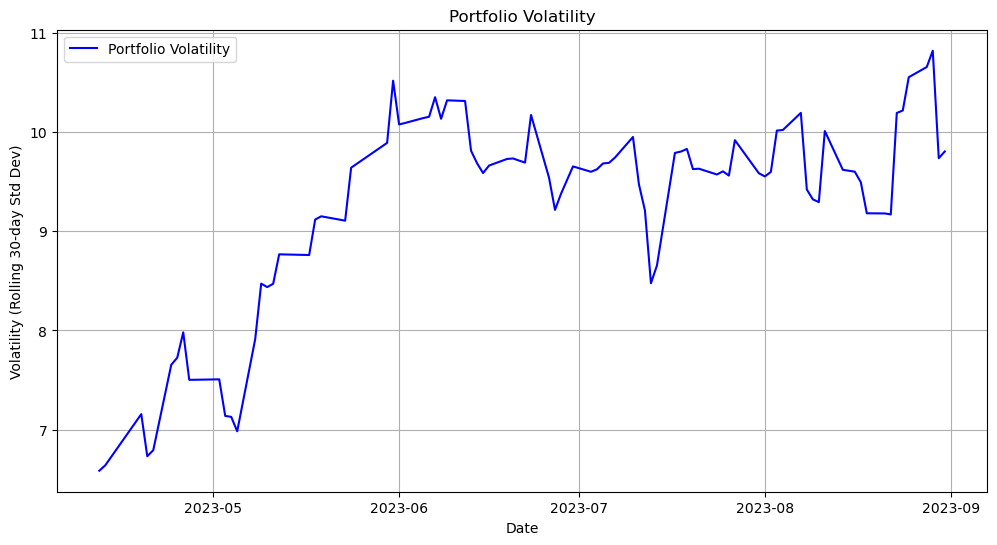

In [632]:
plt.figure(figsize=(12, 6))

plt.plot(portfolio_volatility, label="Portfolio Volatility", color="blue")

plt.xlabel("Date")
plt.ylabel("Volatility (Rolling 30-day Std Dev)")
plt.title("Portfolio Volatility")
plt.legend()
plt.grid()
plt.show()


## Statistical tests

### Sharpe Ratio: Risk-Adjusted Performance


In [636]:
# Assuming risk-free rate (Rf) is 5% annually
risk_free_rate = 0.05 / 252  # Converting to daily rate

# Portfolio Sharpe Ratio
portfolio_sharpe = (portfolio_returns.mean() - risk_free_rate) / portfolio_returns.std()


print(f"Portfolio Sharpe Ratio: {portfolio_sharpe:.4f}")

Portfolio Sharpe Ratio: 0.1527


In [640]:
df_filtered = df_final.filter(like="cost", axis=1)
df_filtered.head()  # Display the first few rows


""
Stock
ABB
ABB
ABB
ABB
ABB
